In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
!ls
!free -g
# !kill -9 -1

datalab  drive
              total        used        free      shared  buff/cache   available
Mem:             12           0           2           0          10          11
Swap:             0           0           0


In [4]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.


In [0]:
df= pd.read_csv('drive/projects/mnist/data/train.csv') #Load training dataset

In [7]:

df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
df.isnull().values.any()
# df.isnull().values.sum() - Used to get number of null values

False

In [10]:
len(df), len(df.columns)

(42000, 785)

In [0]:
def return_normalized_data_labels(df):
  labels = np.zeros(shape=(len(df),))
  data = np.zeros(shape = (len(df),len(df.columns)-1))
  labels = df['label'].values
  labels = to_categorical(labels, num_classes=10)
  data = df.drop(['label'], axis = 1).values
  scaler = StandardScaler()
  scaler.fit(data)
  data = scaler.transform(data)
  return data,labels

In [78]:
data, labels = return_normalized_data_labels(df)
data.shape, labels.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


((42000, 784), (42000, 10))

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D ,SeparableConv2D
from keras.optimizers import RMSprop
# from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [0]:
batch_size = 128
epochs = 30

In [0]:
model = Sequential()

model.add(Dense(32, input_shape=(784,)))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation ='relu'))
model.add(Dense(10, activation= 'softmax'))
model.compile(loss= 'categorical_crossentropy', metrics = ['acc'], optimizer = RMSprop(lr=0.001))

In [178]:
history = model.fit(data, labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,)

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.1373 - acc: 0.9594 - val_loss: 0.1626 - val_acc: 0.9506
Epoch 2/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.1117 - acc: 0.9661 - val_loss: 0.1641 - val_acc: 0.9504
Epoch 3/100
33600/33600 [==============================] - 3s 83us/step - loss: 0.0954 - acc: 0.9724 - val_loss: 0.1589 - val_acc: 0.9565
Epoch 4/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0828 - acc: 0.9743 - val_loss: 0.1561 - val_acc: 0.9546
Epoch 5/100
26880/33600 [=======================>......] - ETA: 0s - loss: 0.0682 - acc: 0.9794

33600/33600 [==============================] - 3s 86us/step - loss: 0.0706 - acc: 0.9785 - val_loss: 0.1543 - val_acc: 0.9573
Epoch 6/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0633 - acc: 0.9802 - val_loss: 0.1634 - val_acc: 0.9560
Epoch 7/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0550 - acc: 0.9832 - val_loss: 0.1695 - val_acc: 0.9556
Epoch 8/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0488 - acc: 0.9850 - val_loss: 0.1721 - val_acc: 0.9574
Epoch 9/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0417 - acc: 0.9874 - val_loss: 0.1794 - val_acc: 0.9577
Epoch 10/100
 8832/33600 [======>.......................] - ETA: 1s - loss: 0.0338 - acc: 0.9897

33600/33600 [==============================] - 3s 85us/step - loss: 0.0377 - acc: 0.9885 - val_loss: 0.1767 - val_acc: 0.9583
Epoch 11/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0324 - acc: 0.9901 - val_loss: 0.1888 - val_acc: 0.9595
Epoch 12/100
33600/33600 [==============================] - 3s 83us/step - loss: 0.0292 - acc: 0.9910 - val_loss: 0.1868 - val_acc: 0.9587
Epoch 13/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0251 - acc: 0.9924 - val_loss: 0.2020 - val_acc: 0.9587
Epoch 14/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0223 - acc: 0.9936 - val_loss: 0.1947 - val_acc: 0.9592
Epoch 15/100
 6144/33600 [====>.........................] - ETA: 2s - loss: 0.0180 - acc: 0.9951

33600/33600 [==============================] - 3s 86us/step - loss: 0.0196 - acc: 0.9943 - val_loss: 0.1996 - val_acc: 0.9611
Epoch 16/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0179 - acc: 0.9943 - val_loss: 0.2126 - val_acc: 0.9587
Epoch 17/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0161 - acc: 0.9950 - val_loss: 0.2090 - val_acc: 0.9601
Epoch 18/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0134 - acc: 0.9959 - val_loss: 0.2281 - val_acc: 0.9606
Epoch 19/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0136 - acc: 0.9961 - val_loss: 0.2225 - val_acc: 0.9604
Epoch 20/100
 6272/33600 [====>.........................] - ETA: 2s - loss: 0.0097 - acc: 0.9971

33600/33600 [==============================] - 3s 84us/step - loss: 0.0120 - acc: 0.9963 - val_loss: 0.2260 - val_acc: 0.9623
Epoch 21/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0108 - acc: 0.9967 - val_loss: 0.2279 - val_acc: 0.9618
Epoch 22/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0100 - acc: 0.9972 - val_loss: 0.2434 - val_acc: 0.9613
Epoch 23/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0086 - acc: 0.9978 - val_loss: 0.2731 - val_acc: 0.9573
Epoch 24/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0079 - acc: 0.9977 - val_loss: 0.2564 - val_acc: 0.9608
Epoch 25/100
 7296/33600 [=====>........................] - ETA: 2s - loss: 0.0073 - acc: 0.9986

33600/33600 [==============================] - 3s 85us/step - loss: 0.0078 - acc: 0.9978 - val_loss: 0.2755 - val_acc: 0.9586
Epoch 26/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0074 - acc: 0.9981 - val_loss: 0.2591 - val_acc: 0.9617
Epoch 27/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0065 - acc: 0.9982 - val_loss: 0.2713 - val_acc: 0.9613
Epoch 28/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0062 - acc: 0.9985 - val_loss: 0.2651 - val_acc: 0.9607
Epoch 29/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0068 - acc: 0.9981 - val_loss: 0.2917 - val_acc: 0.9590
Epoch 30/100
 4864/33600 [===>..........................] - ETA: 2s - loss: 0.0040 - acc: 0.9984

33600/33600 [==============================] - 3s 84us/step - loss: 0.0066 - acc: 0.9981 - val_loss: 0.2853 - val_acc: 0.9601
Epoch 31/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0065 - acc: 0.9981 - val_loss: 0.3000 - val_acc: 0.9595
Epoch 32/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0055 - acc: 0.9987 - val_loss: 0.2876 - val_acc: 0.9602
Epoch 33/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0052 - acc: 0.9987 - val_loss: 0.2964 - val_acc: 0.9602
Epoch 34/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0052 - acc: 0.9987 - val_loss: 0.2944 - val_acc: 0.9613
Epoch 35/100
 7168/33600 [=====>........................] - ETA: 2s - loss: 0.0014 - acc: 0.9993

33600/33600 [==============================] - 3s 85us/step - loss: 0.0054 - acc: 0.9983 - val_loss: 0.3112 - val_acc: 0.9599
Epoch 36/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.2964 - val_acc: 0.9602
Epoch 37/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.3058 - val_acc: 0.9602
Epoch 38/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0049 - acc: 0.9984 - val_loss: 0.2981 - val_acc: 0.9627
Epoch 39/100
33600/33600 [==============================] - 3s 83us/step - loss: 0.0045 - acc: 0.9987 - val_loss: 0.3036 - val_acc: 0.9623
Epoch 40/100
 6528/33600 [====>.........................] - ETA: 2s - loss: 0.0017 - acc: 0.9995

33600/33600 [==============================] - 3s 83us/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.3226 - val_acc: 0.9624
Epoch 41/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0037 - acc: 0.9989 - val_loss: 0.3126 - val_acc: 0.9629
Epoch 42/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0036 - acc: 0.9991 - val_loss: 0.3196 - val_acc: 0.9620
Epoch 43/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.3150 - val_acc: 0.9633
Epoch 44/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0044 - acc: 0.9990 - val_loss: 0.3278 - val_acc: 0.9627
Epoch 45/100
 4608/33600 [===>..........................] - ETA: 2s - loss: 0.0030 - acc: 0.9989

33600/33600 [==============================] - 3s 86us/step - loss: 0.0044 - acc: 0.9986 - val_loss: 0.3236 - val_acc: 0.9613
Epoch 46/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0044 - acc: 0.9987 - val_loss: 0.3322 - val_acc: 0.9626
Epoch 47/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0041 - acc: 0.9986 - val_loss: 0.3286 - val_acc: 0.9604
Epoch 48/100
33600/33600 [==============================] - 3s 83us/step - loss: 0.0038 - acc: 0.9988 - val_loss: 0.3328 - val_acc: 0.9625
Epoch 49/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0041 - acc: 0.9990 - val_loss: 0.3396 - val_acc: 0.9619
Epoch 50/100
 7808/33600 [=====>........................] - ETA: 2s - loss: 0.0025 - acc: 0.9995

33600/33600 [==============================] - 3s 85us/step - loss: 0.0045 - acc: 0.9989 - val_loss: 0.3339 - val_acc: 0.9617
Epoch 51/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0042 - acc: 0.9987 - val_loss: 0.3469 - val_acc: 0.9610
Epoch 52/100
33600/33600 [==============================] - 3s 83us/step - loss: 0.0042 - acc: 0.9987 - val_loss: 0.3442 - val_acc: 0.9607
Epoch 53/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0036 - acc: 0.9990 - val_loss: 0.3480 - val_acc: 0.9610
Epoch 54/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0038 - acc: 0.9988 - val_loss: 0.3549 - val_acc: 0.9606
Epoch 55/100
 7296/33600 [=====>........................] - ETA: 2s - loss: 0.0022 - acc: 0.9993

33600/33600 [==============================] - 3s 84us/step - loss: 0.0029 - acc: 0.9992 - val_loss: 0.3447 - val_acc: 0.9608
Epoch 56/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0035 - acc: 0.9990 - val_loss: 0.3426 - val_acc: 0.9607
Epoch 57/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0049 - acc: 0.9988 - val_loss: 0.3604 - val_acc: 0.9605
Epoch 58/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0029 - acc: 0.9992 - val_loss: 0.3489 - val_acc: 0.9617
Epoch 59/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0040 - acc: 0.9987 - val_loss: 0.3453 - val_acc: 0.9625
Epoch 60/100
 6656/33600 [====>.........................] - ETA: 2s - loss: 0.0044 - acc: 0.9985

33600/33600 [==============================] - 3s 85us/step - loss: 0.0039 - acc: 0.9988 - val_loss: 0.3550 - val_acc: 0.9624
Epoch 61/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0036 - acc: 0.9990 - val_loss: 0.3643 - val_acc: 0.9613
Epoch 62/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.3580 - val_acc: 0.9624
Epoch 63/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0032 - acc: 0.9992 - val_loss: 0.3836 - val_acc: 0.9589
Epoch 64/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.3647 - val_acc: 0.9613
Epoch 65/100
 6144/33600 [====>.........................] - ETA: 2s - loss: 0.0024 - acc: 0.9995

33600/33600 [==============================] - 3s 86us/step - loss: 0.0029 - acc: 0.9993 - val_loss: 0.3732 - val_acc: 0.9613
Epoch 66/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0032 - acc: 0.9992 - val_loss: 0.3592 - val_acc: 0.9596
Epoch 67/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0035 - acc: 0.9992 - val_loss: 0.3667 - val_acc: 0.9607
Epoch 68/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.3760 - val_acc: 0.9610
Epoch 69/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0039 - acc: 0.9991 - val_loss: 0.3950 - val_acc: 0.9593
Epoch 70/100
 6528/33600 [====>.........................] - ETA: 2s - loss: 0.0027 - acc: 0.9988

33600/33600 [==============================] - 3s 85us/step - loss: 0.0037 - acc: 0.9991 - val_loss: 0.3790 - val_acc: 0.9612
Epoch 71/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0030 - acc: 0.9992 - val_loss: 0.3776 - val_acc: 0.9602
Epoch 72/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0038 - acc: 0.9990 - val_loss: 0.3847 - val_acc: 0.9607
Epoch 73/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0027 - acc: 0.9993 - val_loss: 0.3914 - val_acc: 0.9589
Epoch 74/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0039 - acc: 0.9990 - val_loss: 0.3963 - val_acc: 0.9608
Epoch 75/100
 6016/33600 [====>.........................] - ETA: 2s - loss: 0.0024 - acc: 0.9993    

33600/33600 [==============================] - 3s 86us/step - loss: 0.0032 - acc: 0.9993 - val_loss: 0.3715 - val_acc: 0.9605
Epoch 76/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.4151 - val_acc: 0.9592
Epoch 77/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0048 - acc: 0.9988 - val_loss: 0.3963 - val_acc: 0.9586
Epoch 78/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0045 - acc: 0.9991 - val_loss: 0.3895 - val_acc: 0.9596
Epoch 79/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.3968 - val_acc: 0.9590
Epoch 80/100
 4608/33600 [===>..........................] - ETA: 2s - loss: 0.0024 - acc: 0.9993

33600/33600 [==============================] - 3s 86us/step - loss: 0.0035 - acc: 0.9989 - val_loss: 0.3780 - val_acc: 0.9610
Epoch 81/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0040 - acc: 0.9991 - val_loss: 0.3902 - val_acc: 0.9608
Epoch 82/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0030 - acc: 0.9992 - val_loss: 0.4055 - val_acc: 0.9593
Epoch 83/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0052 - acc: 0.9987 - val_loss: 0.4018 - val_acc: 0.9608
Epoch 84/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0033 - acc: 0.9993 - val_loss: 0.3975 - val_acc: 0.9588
Epoch 85/100
 3968/33600 [==>...........................] - ETA: 2s - loss: 6.3246e-04 - acc: 0.9997

33600/33600 [==============================] - 3s 86us/step - loss: 0.0034 - acc: 0.9993 - val_loss: 0.4020 - val_acc: 0.9602
Epoch 86/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0029 - acc: 0.9991 - val_loss: 0.4044 - val_acc: 0.9602
Epoch 87/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0033 - acc: 0.9991 - val_loss: 0.4073 - val_acc: 0.9602
Epoch 88/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0048 - acc: 0.9989 - val_loss: 0.4211 - val_acc: 0.9574
Epoch 89/100
33600/33600 [==============================] - 3s 86us/step - loss: 0.0030 - acc: 0.9990 - val_loss: 0.4035 - val_acc: 0.9601
Epoch 90/100
 5504/33600 [===>..........................] - ETA: 2s - loss: 8.1133e-04 - acc: 0.9998

33600/33600 [==============================] - 3s 85us/step - loss: 0.0036 - acc: 0.9991 - val_loss: 0.4096 - val_acc: 0.9602
Epoch 91/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0032 - acc: 0.9992 - val_loss: 0.3882 - val_acc: 0.9606
Epoch 92/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.3924 - val_acc: 0.9615
Epoch 93/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0023 - acc: 0.9994 - val_loss: 0.3933 - val_acc: 0.9625
Epoch 94/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0026 - acc: 0.9993 - val_loss: 0.4037 - val_acc: 0.9625
Epoch 95/100
 8064/33600 [======>.......................] - ETA: 1s - loss: 6.6283e-04 - acc: 0.9998

33600/33600 [==============================] - 3s 85us/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.3996 - val_acc: 0.9617
Epoch 96/100
33600/33600 [==============================] - 3s 85us/step - loss: 0.0034 - acc: 0.9989 - val_loss: 0.3903 - val_acc: 0.9631
Epoch 97/100
33600/33600 [==============================] - 3s 84us/step - loss: 0.0025 - acc: 0.9993 - val_loss: 0.3943 - val_acc: 0.9618
Epoch 98/100
33600/33600 [==============================] - 3s 82us/step - loss: 0.0038 - acc: 0.9991 - val_loss: 0.4026 - val_acc: 0.9612
Epoch 99/100
33600/33600 [==============================] - 3s 82us/step - loss: 0.0047 - acc: 0.9990 - val_loss: 0.3946 - val_acc: 0.9619
Epoch 100/100
 9984/33600 [=======>......................] - ETA: 1s - loss: 5.9896e-04 - acc: 0.9998

33600/33600 [==============================] - 3s 84us/step - loss: 0.0033 - acc: 0.9991 - val_loss: 0.4120 - val_acc: 0.9607


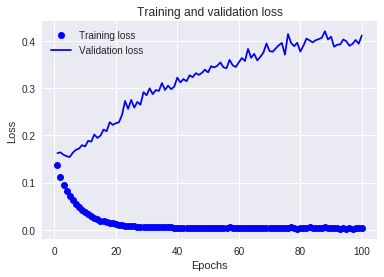

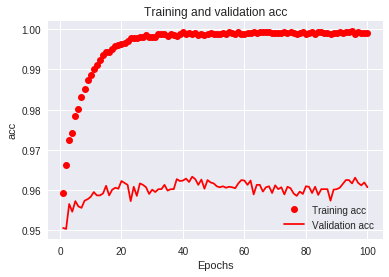

In [184]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

In [82]:
data = data.reshape(-1,28,28,1)
data.shape, labels.shape

((42000, 28, 28, 1), (42000, 10))

In [0]:
datagen = ImageDataGenerator(featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,  
    zoom_range = 0.1, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False)

In [0]:
datagen.fit(data)

In [0]:
model_conv = Sequential()
model_conv.add(SeparableConv2D(32,(3,3),padding= 'valid', activation='relu',input_shape=(28,28,1)))
model_conv.add(MaxPooling2D((2,2)))
model_conv.add(SeparableConv2D(64,(3,3),activation='relu'))
model_conv.add(Dropout(0.25))
model_conv.add(MaxPooling2D((2,2)))
model_conv.add(SeparableConv2D(64,(3,3), activation='relu'))
model_conv.add(Flatten())
model_conv.add(Dropout(0.5))
model_conv.add(Dense(64,activation = 'relu'))
model_conv.add(Dense(10, activation = 'softmax'))

In [108]:
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 26, 26, 32)        73        
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 11, 11, 64)        2400      
_________________________________________________________________
dropout_13 (Dropout)         (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 3, 3, 64)          4736      
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
__________

In [0]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
model_conv.compile(loss= 'categorical_crossentropy',\
                   metrics = ['acc'], optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0))

In [0]:
batch_size = 128
epochs = 50

In [112]:
val_data = data[:10000]
val_labels = labels[:10000]
val_data.shape, val_labels.shape

((10000, 28, 28, 1), (10000, 10))

In [118]:
history_conv = model_conv.fit_generator(datagen.flow(data, labels,
          batch_size=batch_size,),
          validation_data = (val_data,val_labels),
          epochs=epochs,callbacks = [lr_reduction])

Epoch 1/50
329/329 [==============================] - 17s 51ms/step - loss: 1.1562 - acc: 0.6203 - val_loss: 0.3337 - val_acc: 0.9090
Epoch 2/50
329/329 [==============================] - 16s 50ms/step - loss: 0.5719 - acc: 0.8195 - val_loss: 0.2245 - val_acc: 0.9393
Epoch 3/50
 79/329 [======>.......................] - ETA: 11s - loss: 0.4879 - acc: 0.8465

329/329 [==============================] - 17s 50ms/step - loss: 0.4409 - acc: 0.8631 - val_loss: 0.1594 - val_acc: 0.9530
Epoch 4/50
329/329 [==============================] - 17s 51ms/step - loss: 0.3737 - acc: 0.8854 - val_loss: 0.1484 - val_acc: 0.9579
Epoch 5/50
116/329 [=========>....................] - ETA: 9s - loss: 0.3551 - acc: 0.8887

329/329 [==============================] - 17s 51ms/step - loss: 0.3308 - acc: 0.8974 - val_loss: 0.1105 - val_acc: 0.9677
Epoch 6/50
329/329 [==============================] - 17s 51ms/step - loss: 0.2956 - acc: 0.9071 - val_loss: 0.1068 - val_acc: 0.9689
Epoch 7/50
 84/329 [======>.......................] - ETA: 11s - loss: 0.2692 - acc: 0.9142

329/329 [==============================] - 17s 51ms/step - loss: 0.2695 - acc: 0.9168 - val_loss: 0.0969 - val_acc: 0.9723
Epoch 8/50
329/329 [==============================] - 17s 51ms/step - loss: 0.2491 - acc: 0.9231 - val_loss: 0.0858 - val_acc: 0.9755
Epoch 9/50
 89/329 [=======>......................] - ETA: 11s - loss: 0.2460 - acc: 0.9290

329/329 [==============================] - 17s 51ms/step - loss: 0.2359 - acc: 0.9278 - val_loss: 0.1060 - val_acc: 0.9675
Epoch 10/50
329/329 [==============================] - 17s 50ms/step - loss: 0.2321 - acc: 0.9299 - val_loss: 0.0814 - val_acc: 0.9775
Epoch 11/50
 99/329 [========>.....................] - ETA: 10s - loss: 0.2095 - acc: 0.9329

329/329 [==============================] - 17s 50ms/step - loss: 0.2171 - acc: 0.9342 - val_loss: 0.0729 - val_acc: 0.9783
Epoch 12/50
329/329 [==============================] - 17s 52ms/step - loss: 0.2092 - acc: 0.9353 - val_loss: 0.0734 - val_acc: 0.9775
Epoch 13/50
 81/329 [======>.......................] - ETA: 12s - loss: 0.2080 - acc: 0.9344

329/329 [==============================] - 17s 52ms/step - loss: 0.2023 - acc: 0.9382 - val_loss: 0.0671 - val_acc: 0.9803
Epoch 14/50
329/329 [==============================] - 16s 50ms/step - loss: 0.1905 - acc: 0.9408 - val_loss: 0.0687 - val_acc: 0.9793
Epoch 15/50
128/329 [==========>...................] - ETA: 9s - loss: 0.1896 - acc: 0.9437

329/329 [==============================] - 16s 50ms/step - loss: 0.1876 - acc: 0.9434 - val_loss: 0.0626 - val_acc: 0.9809
Epoch 16/50
329/329 [==============================] - 16s 50ms/step - loss: 0.1802 - acc: 0.9455 - val_loss: 0.0600 - val_acc: 0.9811
Epoch 17/50
130/329 [==========>...................] - ETA: 9s - loss: 0.1747 - acc: 0.9465

329/329 [==============================] - 17s 50ms/step - loss: 0.1736 - acc: 0.9465 - val_loss: 0.0612 - val_acc: 0.9815
Epoch 18/50
329/329 [==============================] - 17s 50ms/step - loss: 0.1715 - acc: 0.9480 - val_loss: 0.0574 - val_acc: 0.9818
Epoch 19/50
126/329 [==========>...................] - ETA: 9s - loss: 0.1644 - acc: 0.9484

329/329 [==============================] - 16s 50ms/step - loss: 0.1684 - acc: 0.9486 - val_loss: 0.0645 - val_acc: 0.9796
Epoch 20/50
329/329 [==============================] - 17s 50ms/step - loss: 0.1659 - acc: 0.9492 - val_loss: 0.0590 - val_acc: 0.9807
Epoch 21/50
128/329 [==========>...................] - ETA: 9s - loss: 0.1596 - acc: 0.9534

329/329 [==============================] - 16s 50ms/step - loss: 0.1633 - acc: 0.9510 - val_loss: 0.0530 - val_acc: 0.9823
Epoch 22/50
329/329 [==============================] - 16s 50ms/step - loss: 0.1588 - acc: 0.9521 - val_loss: 0.0514 - val_acc: 0.9829
Epoch 23/50
131/329 [==========>...................] - ETA: 9s - loss: 0.1532 - acc: 0.9535

329/329 [==============================] - 17s 50ms/step - loss: 0.1498 - acc: 0.9544 - val_loss: 0.0539 - val_acc: 0.9815
Epoch 24/50
329/329 [==============================] - 16s 50ms/step - loss: 0.1506 - acc: 0.9541 - val_loss: 0.0541 - val_acc: 0.9820
Epoch 25/50
130/329 [==========>...................] - ETA: 9s - loss: 0.1496 - acc: 0.9543

329/329 [==============================] - 17s 51ms/step - loss: 0.1477 - acc: 0.9558 - val_loss: 0.0482 - val_acc: 0.9844
Epoch 26/50
329/329 [==============================] - 16s 50ms/step - loss: 0.1446 - acc: 0.9556 - val_loss: 0.0502 - val_acc: 0.9839
Epoch 27/50
149/329 [============>.................] - ETA: 8s - loss: 0.1500 - acc: 0.9535

329/329 [==============================] - 17s 50ms/step - loss: 0.1450 - acc: 0.9558 - val_loss: 0.0461 - val_acc: 0.9853
Epoch 28/50
329/329 [==============================] - 16s 50ms/step - loss: 0.1402 - acc: 0.9572 - val_loss: 0.0488 - val_acc: 0.9837
Epoch 29/50
120/329 [=========>....................]

329/329 [==============================] - 17s 50ms/step - loss: 0.1415 - acc: 0.9566 - val_loss: 0.0461 - val_acc: 0.9848
Epoch 30/50
329/329 [==============================] - 17s 50ms/step - loss: 0.1381 - acc: 0.9575 - val_loss: 0.0428 - val_acc: 0.9856
Epoch 31/50
124/329 [==========>...................] - ETA: 9s - loss: 0.1397 - acc: 0.9565

329/329 [==============================] - 16s 50ms/step - loss: 0.1384 - acc: 0.9574 - val_loss: 0.0480 - val_acc: 0.9851
Epoch 32/50
329/329 [==============================] - 16s 50ms/step - loss: 0.1307 - acc: 0.9594 - val_loss: 0.0455 - val_acc: 0.9856
Epoch 33/50
146/329 [============>.................] - ETA: 8s - loss: 0.1330 - acc: 0.9591

329/329 [==============================] - 16s 50ms/step - loss: 0.1308 - acc: 0.9602 - val_loss: 0.0444 - val_acc: 0.9865
Epoch 34/50
329/329 [==============================] - 16s 49ms/step - loss: 0.1282 - acc: 0.9608 - val_loss: 0.0403 - val_acc: 0.9876
Epoch 35/50
151/329 [============>.................] - ETA: 8s - loss: 0.1277 - acc: 0.9607

329/329 [==============================] - 16s 50ms/step - loss: 0.1285 - acc: 0.9608 - val_loss: 0.0480 - val_acc: 0.9846
Epoch 36/50
329/329 [==============================] - 17s 50ms/step - loss: 0.1294 - acc: 0.9610 - val_loss: 0.0456 - val_acc: 0.9862
Epoch 37/50
113/329 [=========>....................] - ETA: 10s - loss: 0.1241 - acc: 0.9624

329/329 [==============================] - 17s 50ms/step - loss: 0.1242 - acc: 0.9629 - val_loss: 0.0396 - val_acc: 0.9880
Epoch 38/50
329/329 [==============================] - 17s 50ms/step - loss: 0.1243 - acc: 0.9620 - val_loss: 0.0393 - val_acc: 0.9876
Epoch 39/50
112/329 [=========>....................] - ETA: 10s - loss: 0.1254 - acc: 0.9610

329/329 [==============================] - 17s 51ms/step - loss: 0.1234 - acc: 0.9621 - val_loss: 0.0405 - val_acc: 0.9879
Epoch 40/50
329/329 [==============================] - 17s 51ms/step - loss: 0.1234 - acc: 0.9630 - val_loss: 0.0434 - val_acc: 0.9857
Epoch 41/50
 98/329 [=======>......................] - ETA: 10s - loss: 0.1233 - acc: 0.9625

329/329 [==============================] - 17s 51ms/step - loss: 0.1207 - acc: 0.9639 - val_loss: 0.0443 - val_acc: 0.9861
Epoch 42/50
329/329 [==============================] - 17s 51ms/step - loss: 0.1188 - acc: 0.9635 - val_loss: 0.0400 - val_acc: 0.9882
Epoch 43/50
 82/329 [======>.......................] - ETA: 11s - loss: 0.1195 - acc: 0.9630

329/329 [==============================] - 17s 51ms/step - loss: 0.1166 - acc: 0.9642 - val_loss: 0.0441 - val_acc: 0.9853
Epoch 44/50
329/329 [==============================] - 17s 52ms/step - loss: 0.1179 - acc: 0.9639 - val_loss: 0.0415 - val_acc: 0.9870
Epoch 45/50
 70/329 [=====>........................] - ETA: 12s - loss: 0.1242 - acc: 0.9646

329/329 [==============================] - 17s 51ms/step - loss: 0.1174 - acc: 0.9641 - val_loss: 0.0394 - val_acc: 0.9868
Epoch 46/50
329/329 [==============================] - 17s 51ms/step - loss: 0.1172 - acc: 0.9650 - val_loss: 0.0388 - val_acc: 0.9885
Epoch 47/50
 74/329 [=====>........................] - ETA: 12s - loss: 0.1064 - acc: 0.9675

329/329 [==============================] - 17s 53ms/step - loss: 0.1173 - acc: 0.9643 - val_loss: 0.0388 - val_acc: 0.9879
Epoch 48/50
329/329 [==============================] - 17s 52ms/step - loss: 0.1120 - acc: 0.9653 - val_loss: 0.0387 - val_acc: 0.9878
Epoch 49/50
 70/329 [=====>........................] - ETA: 12s - loss: 0.1093 - acc: 0.9648

329/329 [==============================] - 17s 51ms/step - loss: 0.1135 - acc: 0.9649 - val_loss: 0.0400 - val_acc: 0.9873
Epoch 50/50
329/329 [==============================] - 17s 50ms/step - loss: 0.1122 - acc: 0.9654 - val_loss: 0.0452 - val_acc: 0.9870


In [123]:
model_conv.evaluate(x = data,y = labels)


42000/42000 [==============================] - 5s 108us/step


[0.0446996246685407, 0.9868333333333333]

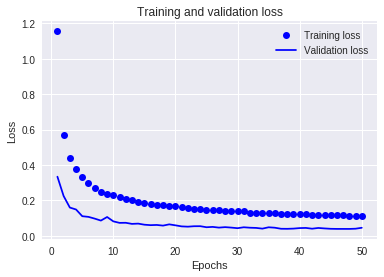

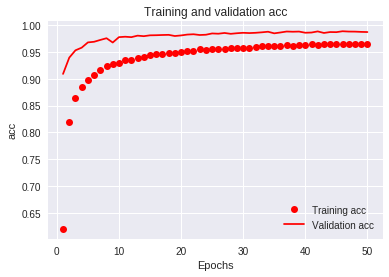

In [122]:
history_dict = history_conv.history
history_dict.keys()



acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(acc)+1)

loss = history_dict['loss']
val_loss = history_dict['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')

plt.legend()
plt.show()

In [0]:
test = pd.read_csv('drive/projects/mnist/data/test.csv')
test = test.values.reshape(-1,28,28,1)

In [0]:
results = model_conv.predict(test)

results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("drive/projects/mnist/mnist_t98.csv",index=False)